# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

                                                            ¡¡¡¡Cayó la Ley!!!!                                                             

                                                         ¿En qué punto te alcanzan?                                                         

Ingrese la velocidad inicial de la moto: 56
Ingrese la aceleración del policía: 6.5


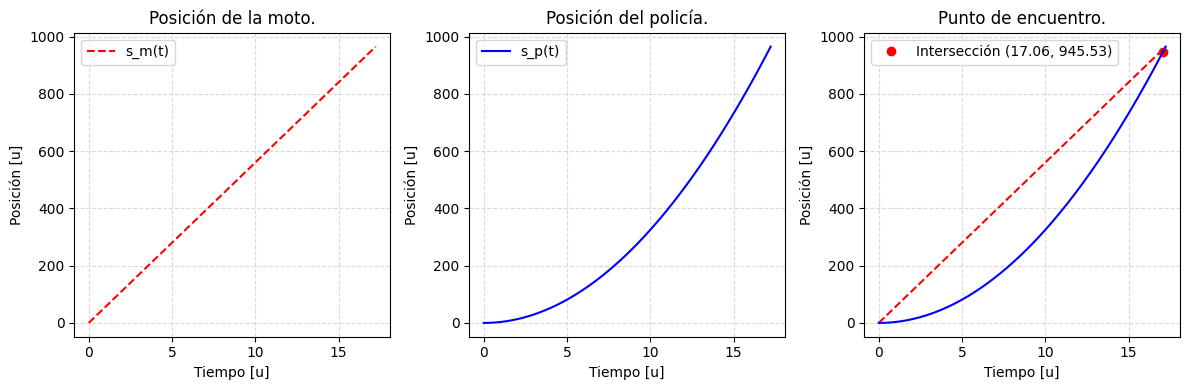

¡Te alcanzan a las 17.23 unidades de tiempo, justamente en 945.53 unidades de longitud.


In [ ]:
# Moto/Polocía

print(f"{'¡¡¡¡Cayó la Ley!!!!':^140}", end='\n\n')
print(f"{'¿En qué punto te alcanzan?':^140}", end='\n\n')

# Variables iniciales

v_m = float(input("Ingrese la velocidad inicial de la moto: "))
a_p = float(input("Ingrese la aceleración del policía: "))

# Arrays para los gráficos.

t = np.linspace(0, 2 * v_m / a_p, 100)  # Intervalo de tiempo
s_m = np.array(v_m * t)  # Posición de la moto en el instante t
s_p = np.array(0.5 * a_p * t **2)

fig, axs = plt.subplots(1, 3, figsize=(12,4))

# s(t) de la moto

axs[0].plot(t, s_m, 'r--', label='s_m(t)')
axs[0].set_title("Posición de la moto.")
axs[0].set_xlabel("Tiempo [u]")
axs[0].set_ylabel("Posición [u]")
'axs[0].grid(ls="--", color="#dadada")'

# s(t) del policía

axs[1].plot(t, s_p, 'b-', label='s_p(t)')
axs[1].set_title("Posición del policía.")
axs[1].set_xlabel("Tiempo [u]")
axs[1].set_ylabel("Posición [u]")
'axs[1].grid(ls="--", color="#dadada")'


# Punto de encuentro.

# Calcular el punto de intersección aproximado
idx = np.argwhere(np.diff(np.sign(s_p - s_m))).flatten()
interseccion_t = t[idx[1]]
interseccion_s = s_p[idx[1]]

# Punto de intersección
axs[2].plot(interseccion_t, interseccion_s, 'ro', label=f'Intersección \
({interseccion_t:.2f}, {interseccion_s:.2f})')

axs[2].plot(t, s_m, 'r--')
axs[2].plot(t, s_p, 'b-')
axs[2].set_title("Punto de encuentro.")
axs[2].set_xlabel("Tiempo [u]")
axs[2].set_ylabel("Posición [u]")

# Leyendas y cuadrículas
for ax in axs:
    ax.grid(True,ls="--", color="#dadada")
    ax.legend()


plt.tight_layout()
plt.show()


print(f"¡Te alcanzan a las {2 * v_m / a_p:.2f} unidades de tiempo, justamente\
 en {interseccion_s:.2f} unidades de longitud.")

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---

In [ ]:
# a) Función de potencial Lennard-Jones

def potencial_l_j(r: np.array, sigma: np.array, epsilon: float) -> float:

  """
  La función determina el valor del potencial V(r) para r en un interrvalo dado.
  """

  return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

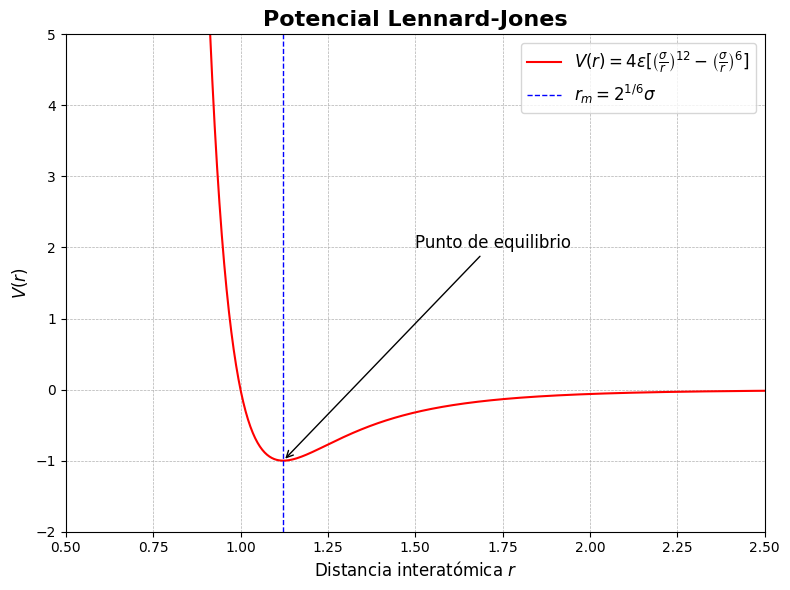

In [ ]:
# b) Distancia de equilibrio en 2^(1/6) * sigma para σ=ϵ=1
sigma = 1
epsilon = 1

# Valores de r (distancia interatómica)
r = np.linspace(0.8, 2.5 * sigma, 500)

# Gráfico de potencial Lennard-Jones

V = np.array(potencial_l_j(r, sigma, epsilon))

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(r, V, label=\
"$V(r)=4\epsilon[\left(\\frac{\sigma}{r}\\right)^{12}-\left(\\frac{\sigma}{r} \
\\right)^{6}]$", color='r', linestyle='-')
ax.set_title("Potencial Lennard-Jones", fontsize=16, fontweight='bold')
ax.set_xlabel("Distancia interatómica $r$", fontsize=12)
ax.set_ylabel("$V(r)$", fontsize=12)


# Distancia de equilibrio, r_m
ax.axvline(x=2 ** (1 / 6) * sigma, color='b', linestyle='--', linewidth=1, \
           label='$r_m = 2^{1/6} \sigma$')


# Límites de visualización.
ax.set_xlim([0.5, 2.5 * sigma])
ax.set_ylim([-2, 5])

# Detalles del gráfico.
ax.annotate('Punto de equilibrio', xy=(2 ** (1 / 6) * sigma, potencial_l_j(2 **\
                            (1 / 6) * sigma, sigma, epsilon)), xytext=(1.5, 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)


ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

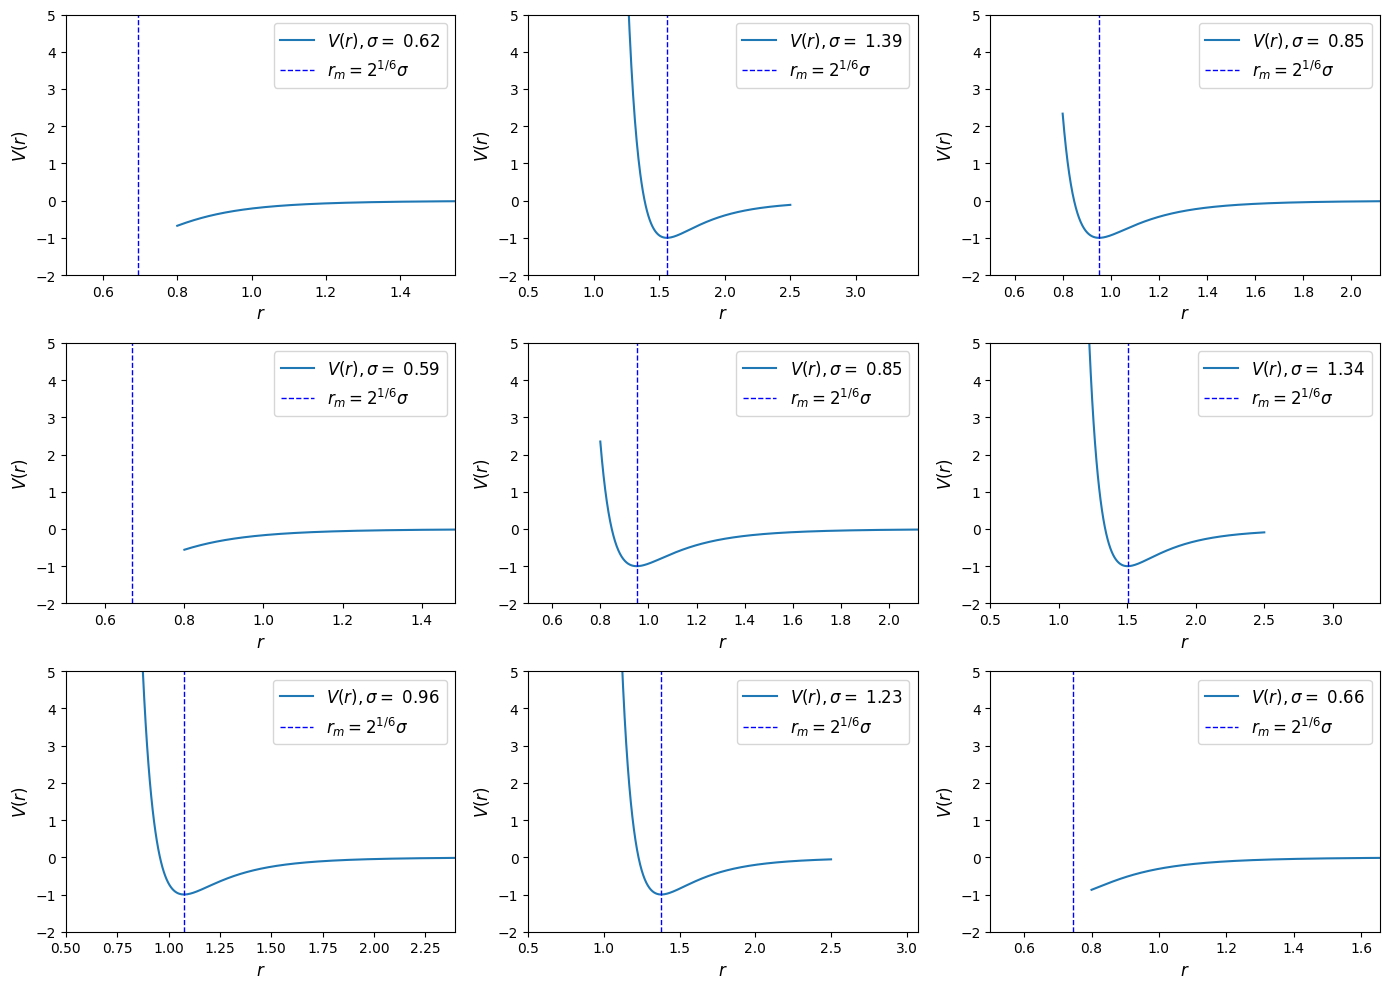

In [ ]:
# c) Verificación de r_m para diferentes valores de sigma, con epsilon constante


fig, ax= plt.subplots(3, 3, figsize=(14, 10))

for i in range(3):
  for j in range(3):

    """
    Comprobar el punto de equilibrio para diferentes valores de sigma.
    """

    sigma = np.random.uniform(0.5, 1.5)

    ax[i][j].plot(r, potencial_l_j(r, sigma, epsilon), label=f'$V(r), \sigma=$ {sigma:.2f}')
    ax[i][j].set_xlabel("$r$", fontsize=12)
    ax[i][j].set_ylabel("$V(r)$", fontsize=12)

    ax[i][j].axvline(x=2 ** (1 / 6) * sigma, color='b', linestyle='--', \
                     linewidth=1, label='$r_m = 2^{1/6}\sigma$')

    ax[i][j].set_xlim([0.5, 2.5 * sigma])
    ax[i][j].set_ylim([-2, 5])

    ax[i][j].legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.

In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

alturas

,Country,"Average Height, Boys, 19 yo (cm)",Girls 19 (cm),Boys 19 (in),Girls 19 (in),Boys 15 (cm),Girls 15 (cm),Boys 10 (cm),Girls 10 (cm),Boys 5 (cm),Girls 5 (cm)
0,Netherlands,183.78,170.36,6 ft.,5 ft. 7 in.,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,6 ft.,5 ft. 7 in.,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,6 ft.,5 ft. 6 in.,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,6 ft.,5 ft. 6 in.,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,6 ft.,5 ft. 7 in.,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,5 ft. 4 in.,5 ft. 2 in.,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,5 ft. 4 in.,5 ft. 2 in.,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,5 ft. 4 in.,5 ft.,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,5 ft. 3 in.,5 ft.,154.15,150.11,125.94,131.02,99.62,103.98


In [ ]:
# Filtrado del DataFrame 'alturas'

# Eliminar las columnas 'Boys 19 (in)' y 'Girls 19 (in)'
alturas.drop(columns=['Boys 19 (in)', 'Girls 19 (in)'], inplace=True)

In [ ]:
# Cambio de nombre para las respectivas columnas.

alturas.rename(columns={'Country':'Pais', 'Average Height, Boys, 19 yo (cm)': \
                        'Niños: 19 años (cm)', \
                        'Girls 19 (cm)':'Niñas: 19 años (cm)', \
                        'Boys 15 (cm)':'Niños: 15 años (cm)', \
                        'Girls 15 (cm)':'Niñas: 15 años (cm)', \
                        'Boys 10 (cm)':'Niños: 10 años (cm)', \
                        'Girls 10 (cm)':'Niñas: 10 años (cm)', \
                        'Boys 5 (cm)':'Niños: 5 años (cm)', \
                        'Girls 5 (cm)':'Niñas: 5 años (cm)'}, inplace=True)

alturas

,Pais,Niños: 19 años (cm),Niñas: 19 años (cm),Niños: 15 años (cm),Niñas: 15 años (cm),Niños: 10 años (cm),Niñas: 10 años (cm),Niños: 5 años (cm),Niñas: 5 años (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,154.15,150.11,125.94,131.02,99.62,103.98


In [ ]:
df_grf = pd.concat([alturas.head(10), alturas.tail(11).iloc[:-1], \
                  alturas[alturas['Pais'].str.contains('Colombia')]])

df_grf

,Pais,Niños: 19 años (cm),Niñas: 19 años (cm),Niños: 15 años (cm),Niñas: 15 años (cm),Niños: 10 años (cm),Niñas: 10 años (cm),Niños: 5 años (cm),Niñas: 5 años (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48
5,Denmark,181.89,169.47,175.00,166.66,144.76,145.55,117.44,118.06
6,Czech Republic,181.19,167.96,174.76,165.88,144.67,144.61,117.86,116.05
7,Latvia,181.17,168.81,172.60,164.36,144.09,144.03,118.69,116.82
8,Slovakia,181.02,167.12,175.43,165.55,144.59,144.89,117.04,116.43
9,Ukraine,180.98,166.62,171.69,162.69,141.20,140.60,116.04,114.07


In [ ]:
# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

income

,Country,Total Wealth (billions USD),GDP per Adult (USD),Wealth per Adult (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%
...,...,...,...,...,...
211,Anguilla,NaN,"$26,510",NaN,0%
212,Cook Islands,NaN,"$26,438",NaN,0%
213,Nauru,NaN,"$23,398",NaN,0%
214,Tuvalu,NaN,"$7,780",NaN,0%
